KERDOUN WASSIM

-------- 

# TRADITIONAL CAPM VS TIME VARYING CAPM

In [59]:
# TRADITIONAL CAPM MODEl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(16,6)

In [301]:
tickers = ['AAPL','MSFT','IBM','GE']
startDate = '2000-01-01'
endDate = '2024-01-01'

data = pd.DataFrame()

for ticker in tickers:
    
    data[ticker] = yf.download(ticker,startDate,endDate)['Adj Close']
    
market_ticker = pd.DataFrame(yf.download('^GSPC',startDate,endDate)['Adj Close'])
market_ticker.rename(columns={'Adj Close':'SP500'},inplace=True)
    
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,IBM,GE
Date,,,,
2000-01-03,0.844004,35.935860,59.361195,130.770905
2000-01-04,0.772846,34.721931,57.346214,125.540070
2000-01-05,0.784155,35.088055,59.361195,125.322136
2000-01-06,0.716296,33.912666,58.337761,126.997627
2000-01-07,0.750226,34.355835,58.081860,131.915207


<Axes: xlabel='Date'>

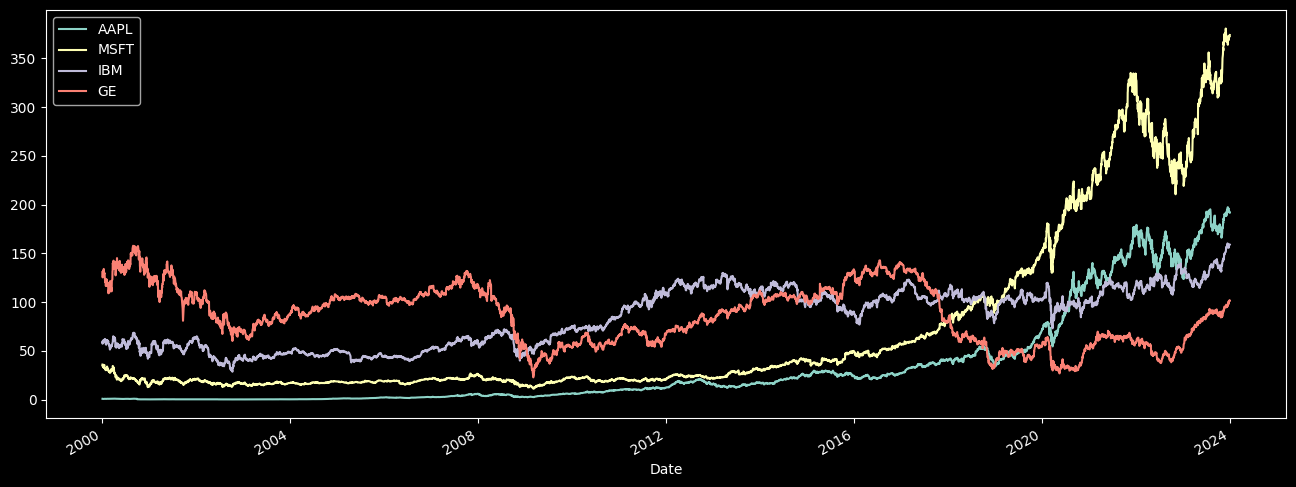

In [292]:
data.plot()

<Axes: xlabel='Date'>

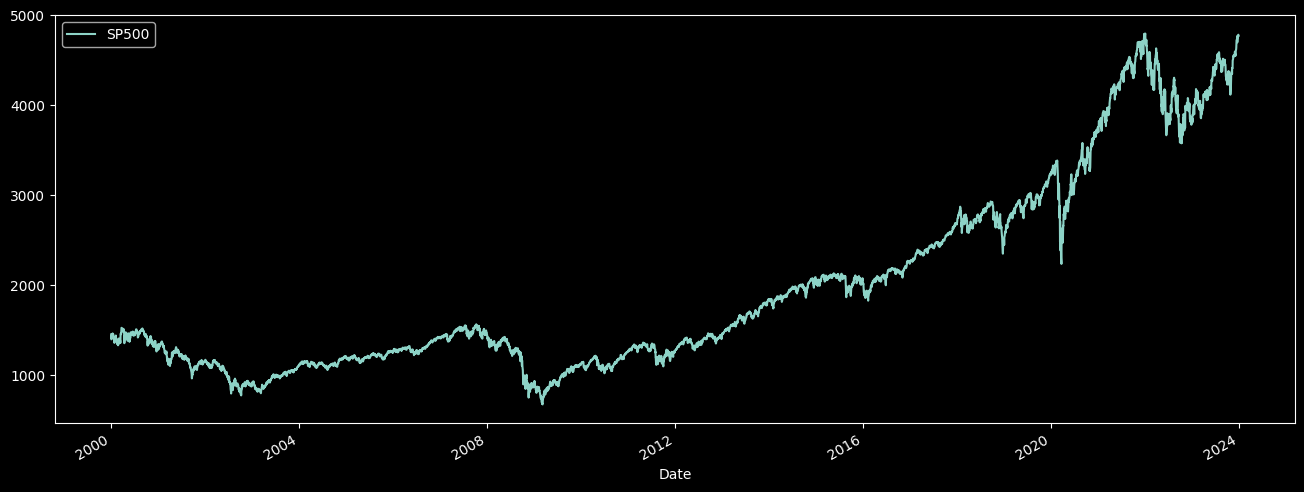

In [293]:
market_ticker.plot()

In [305]:
data = data.join(market_ticker)


data

,AAPL,MSFT,IBM,GE,SP500
Date,,,,,
2000-01-03,0.844004,35.935860,59.361195,130.770905,1455.219971
2000-01-04,0.772846,34.721931,57.346214,125.540070,1399.420044
2000-01-05,0.784155,35.088055,59.361195,125.322136,1402.109985
2000-01-06,0.716296,33.912666,58.337761,126.997627,1403.449951
2000-01-07,0.750226,34.355835,58.081860,131.915207,1441.469971
...,...,...,...,...,...
2023-12-22,192.868134,372.543915,157.716400,100.696007,4754.629883
2023-12-26,192.320221,372.623505,158.757217,101.315971,4774.750000
2023-12-27,192.419830,372.036713,159.000397,101.960182,4781.580078


<Axes: xlabel='Date'>

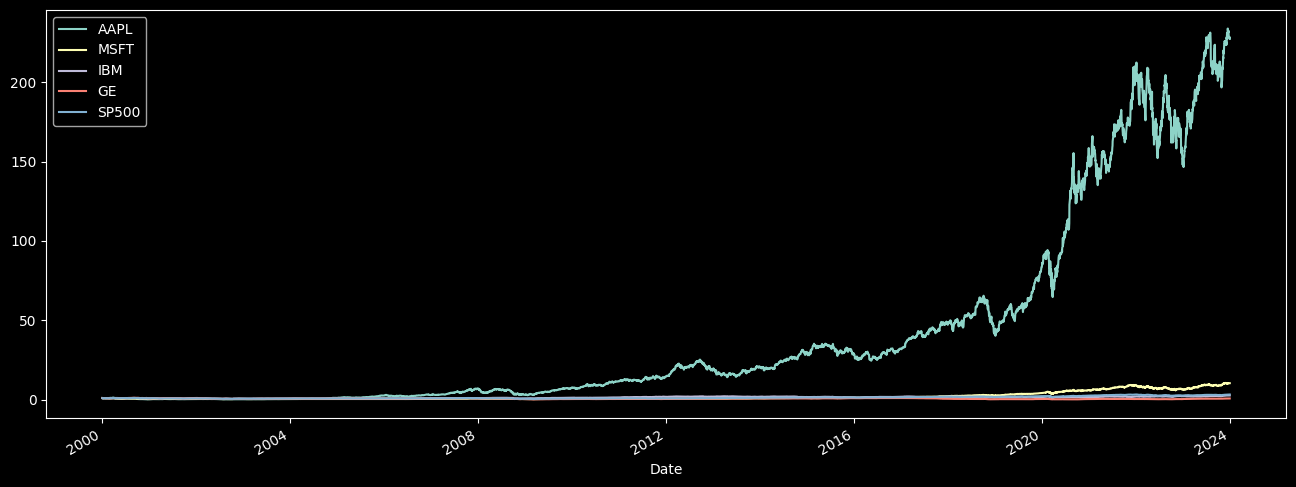

In [306]:
# Normalized data

def normalize_stock(data):
    
    data = data.copy()
    
    for ticker in data.columns:
        
        data[ticker] = data[ticker] / data.iloc[0][ticker]
        
    return data

normalized_data = normalize_stock(data)

normalized_data.plot()

Text(0, 0.5, 'Daily Percentage of Change')

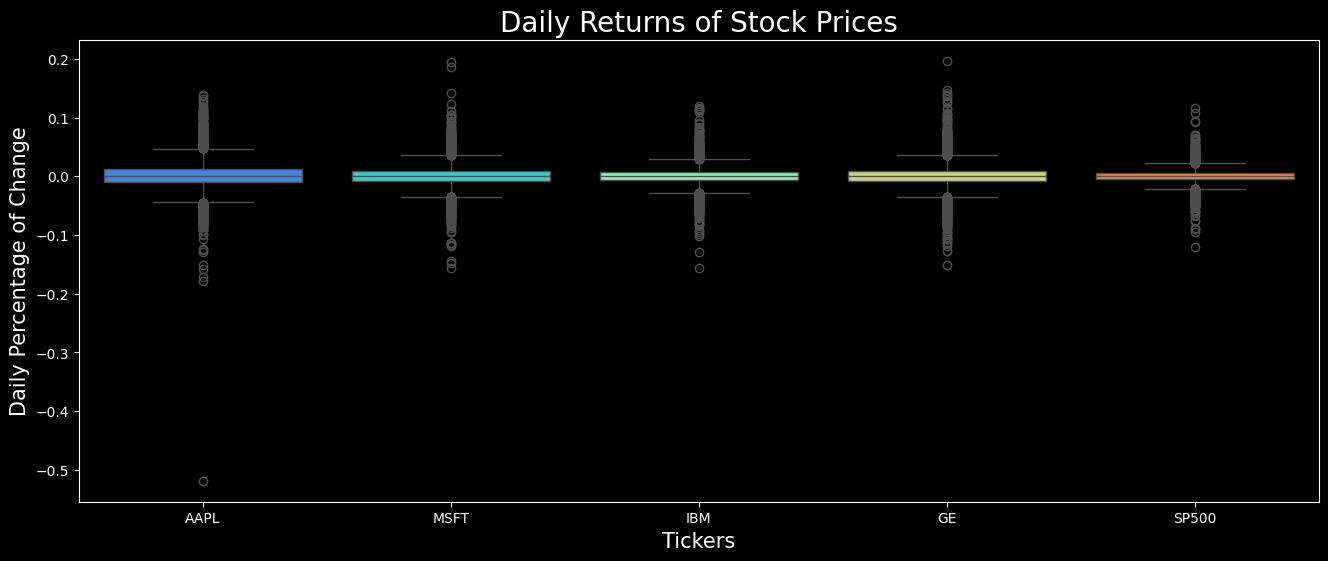

In [307]:
# Percentage of Change

data_daily_return = data.pct_change()

sns.boxplot(data=data_daily_return,palette='rainbow')
plt.title('Daily Returns of Stock Prices',size=20)
plt.xlabel('Tickers',size=15)
plt.ylabel('Daily Percentage of Change',size=15)

Text(0, 0.5, 'Density')

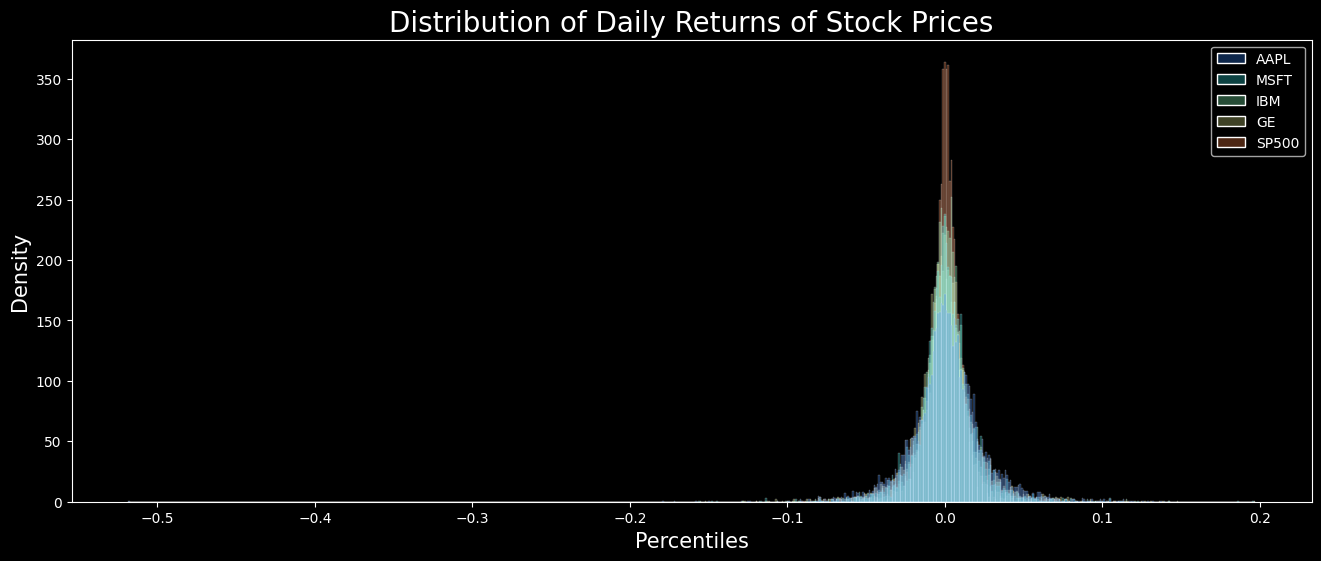

In [308]:
stocks_daily_return = data.pct_change().dropna()

sns.histplot(data=stocks_daily_return,palette='rainbow',alpha=0.3)
plt.title('Distribution of Daily Returns of Stock Prices',size=20)
plt.xlabel('Percentiles',size=15)
plt.ylabel('Density',size=15)

We can see that stock's daily returns are normally distributed (daily zero mean)

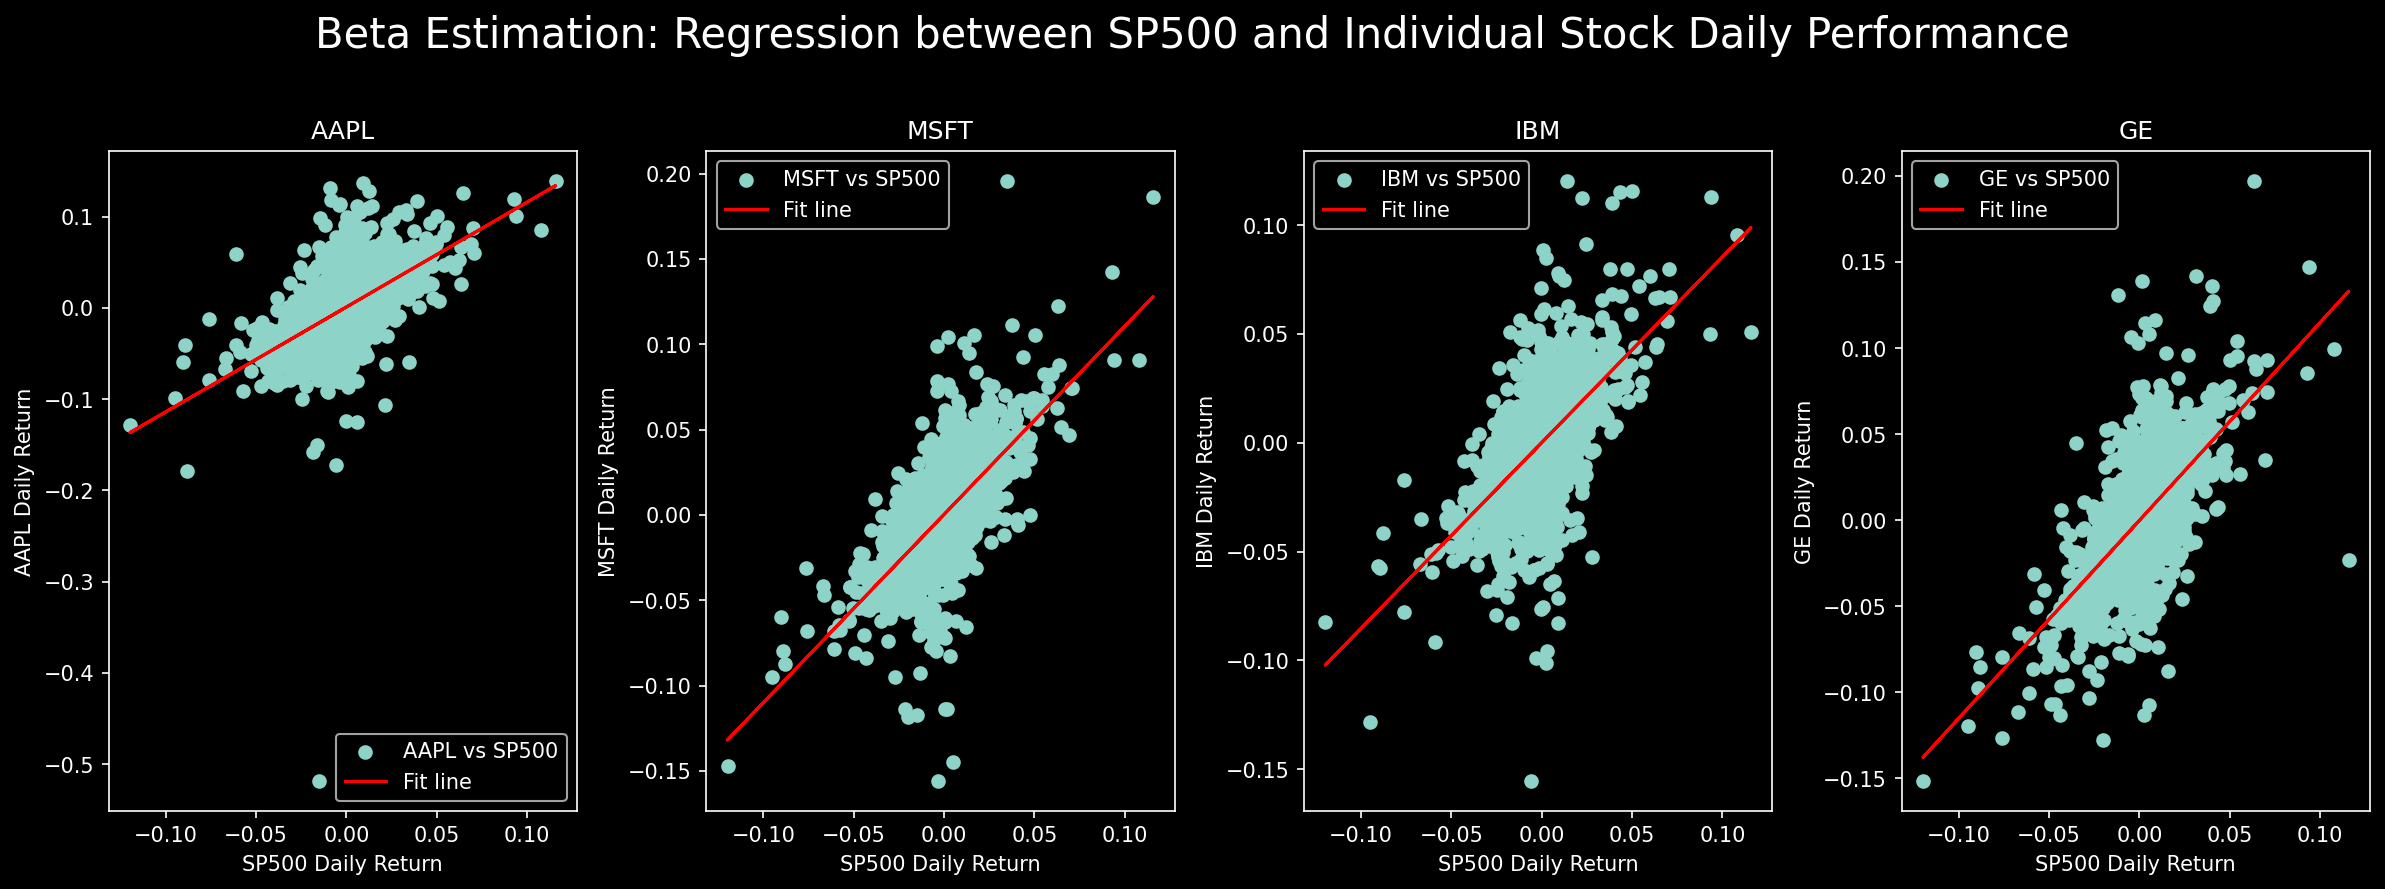

In [313]:
# Initialize empty dictionaries to save results
beta, alpha = dict(), dict()

# Create a subplot for each stock
num_stocks = len([stock for stock in stocks_daily_return.columns if stock != "Date" and stock != "SP500"])
fig, axes = plt.subplots(1, num_stocks, dpi=150, figsize=(16, 6))
axes = axes.flatten()

# Loop over each stock to plot and compute beta and alpha
for idx, stock in enumerate([s for s in stocks_daily_return.columns if s != "Date" and s != "SP500"]):
    
    # Scatter plot between stock and the S&P 500
    axes[idx].scatter(stocks_daily_return["SP500"], stocks_daily_return[stock], label=f'{stock} vs SP500')

    # Fit a line (regression using polyfit of degree 1)
    b_, a_ = np.polyfit(stocks_daily_return["SP500"], stocks_daily_return[stock], 1)
    regression_line = b_ * stocks_daily_return["SP500"] + a_
    axes[idx].plot(stocks_daily_return["SP500"], regression_line, "-", color="r", label='Fit line')

    # Save the regression coefficients for the current stock
    beta[stock] = b_
    alpha[stock] = a_

    # Add titles and labels
    axes[idx].set_title(f'{stock}')
    axes[idx].set_xlabel('SP500 Daily Return')
    axes[idx].set_ylabel(f'{stock} Daily Return')
    axes[idx].legend()

plt.suptitle("Beta Estimation: Regression between SP500 and Individual Stock Daily Performance", size=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [314]:
print('Beta: ',beta)
print('Alpha: ',alpha)

Beta:  {'AAPL': 1.1494827371311391, 'MSFT': 1.1026751295520818, 'IBM': 0.8532511358370135, 'GE': 1.1495944882443259}
Alpha:  {'AAPL': 0.0009040384541074357, 'MSFT': 0.00027212260624370896, 'IBM': 6.34368653436737e-05, 'GE': -0.00013619196793738847}


This image shows scatter plots and regression lines for four stocks (AAPL, MSFT, IBM, and GE) compared to the S&P 500 index. Each plot represents the daily returns of an individual stock on the y-axis versus the S&P 500 daily returns on the x-axis. The red lines indicate the linear regression fit for each stock.

Key observations:

1. All four stocks show a positive correlation with the S&P 500, as evidenced by the upward-sloping regression lines.

2. AAPL (Apple) appears to have the steepest slope, suggesting it may be the most sensitive to market movements among these four stocks.

3. MSFT (Microsoft) shows a slightly less steep slope than AAPL, but still indicates strong market correlation.

4. IBM and GE have similar slopes, which are less steep than AAPL and MSFT, indicating they may be less sensitive to market movements.

5. AAPL shows the widest range of daily returns, suggesting higher volatility.

6. GE shows more dispersed data points, particularly on the negative side, indicating potentially higher downside risk.

7. The x-axis (S&P 500 daily returns) is consistent across all plots, ranging from about -0.10 to 0.10.

8. The y-axis scales differ between stocks, with AAPL having the largest range (-0.5 to 0.2), further indicating its higher volatility.

This analysis is useful for estimating each stock's beta, which measures its sensitivity to market movements. Stocks with steeper slopes would have higher betas, indicating greater market risk and potential for both higher returns and losses relative to the market. Based on the slopes, it appears that AAPL has the highest beta, followed by MSFT, with IBM and GE having lower betas.

Now we have estimated the beta of each stock that is needed for the CAPM estimation according to the below formula: 
ER= rf + beta* (rm-rf)

In [336]:
#import 10yrs US.tbills yields as the risk free rate

yields = pd.read_csv(r"C:\Users\wassim\Downloads\DGS10.csv",parse_dates=['DATE'],index_col='DATE')

yields['DGS10'] = pd.to_numeric(yields['DGS10'],errors='coerce')

yields.tail()

,DGS10
DATE,
2023-12-25,NaN
2023-12-26,3.89
2023-12-27,3.79
2023-12-28,3.84
2023-12-29,3.88


In [337]:
# Initialize the expected return dictionary
ER = dict()
rf = 0.0388 # Recent value in the yields dataframe

# Estimate the expected return of the market using the daily returns
rm = stocks_daily_return["SP500"].mean() * 252

keys = list(beta.keys())
for k in keys:
    # Calculate return for every security using CAPM 
    ER[k] = (rf + beta[k] * (rm-rf))*100

for k in keys:
    print("Expected return based on CAPM model for {} in 2024 is {:.5f}%".format(k, ER[k]))

Expected return based on CAPM model for AAPL in 2024 is 7.33440%
Expected return based on CAPM model for MSFT in 2024 is 7.19374%
Expected return based on CAPM model for IBM in 2024 is 6.44417%
Expected return based on CAPM model for GE in 2024 is 7.33474%


### Now let's jump to the time varying CAPM

In [317]:
from pykalman import KalmanFilter
from statsmodels.tsa.api import VAR

In [318]:
def time_varying_capm(returns):
    """
    Estimates time-varying beta and alpha coefficients for a given set of stock returns using the Kalman Filter algorithm.

    Parameters:
    returns (pd.DataFrame): A pandas DataFrame containing daily returns for multiple stocks, including the S&P 500 index (denoted as 'SP500').

    Returns:
    beta_t (pd.DataFrame): A DataFrame containing the estimated time-varying beta coefficients for each stock.
    alpha_t (pd.DataFrame): A DataFrame containing the estimated time-varying alpha coefficients for each stock.
    """
    # Market return (daily return of the market)
    rm = returns['SP500'].values

    # Initialize DataFrames to store results
    beta_t = pd.DataFrame()
    alpha_t = pd.DataFrame()

    # Loop through each stock (excluding SP500)
    for stock in returns.columns:
        if stock != 'SP500':
            # Prepare state-space model for Kalman Filter
            kf = KalmanFilter(initial_state_mean=np.zeros(2),
                              n_dim_obs=1,
                              n_dim_state=2)
            
            # Set matrices for the Kalman Filter
            kf.transition_matrices = np.array([[1, 1],
                                               [0, 1]])
            kf.observation_matrices = np.array([[1, 0]])
            kf.transition_covariance = 0.01 * np.eye(2)
            kf.observation_covariance = 0.1
            
            # Fit Kalman Filter to estimate time-varying beta and alpha
            kf = kf.em(returns[stock].values, n_iter=10)
            (filtered_state_means, _) = kf.filter(returns[stock].values)
            
            # Store results
            beta_t[stock] = filtered_state_means[:, 0]
            alpha_t[stock] = filtered_state_means[:, 1]
    
    return beta_t, alpha_t

In [319]:
beta_t, alpha_t = time_varying_capm(stocks_daily_return)

In [324]:
alpha_t.index = stocks_daily_return.index
beta_t.index = stocks_daily_return.index

<Axes: xlabel='Date'>

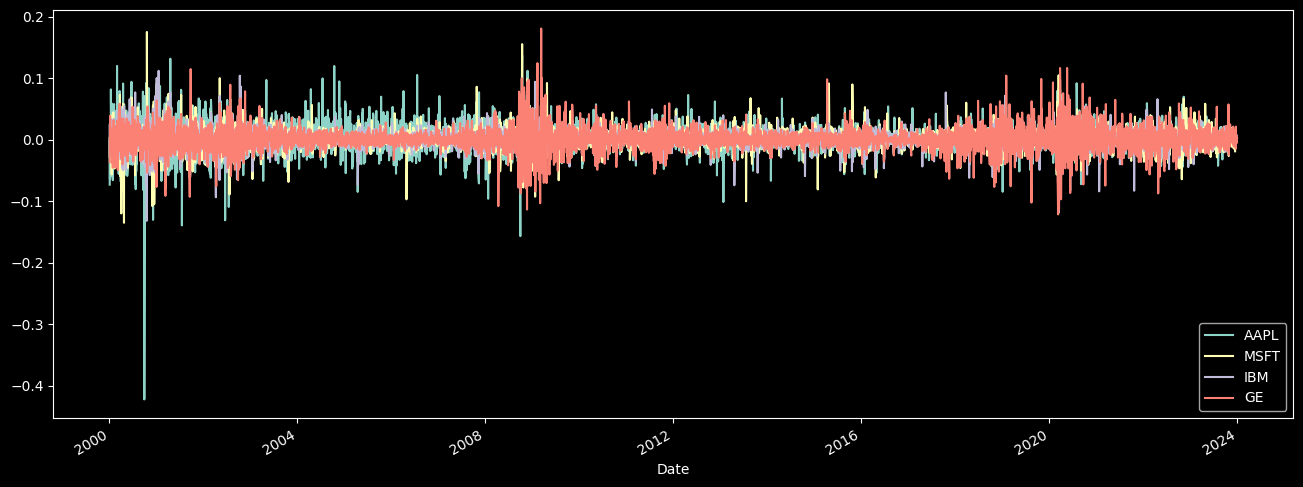

In [325]:
beta_t.plot()

<Axes: xlabel='Date'>

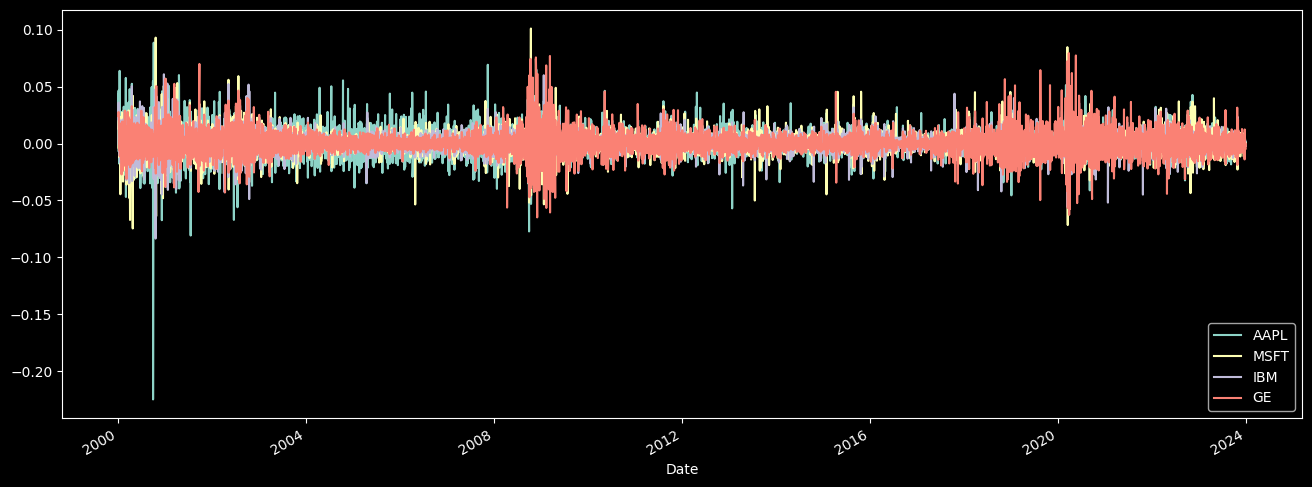

In [326]:
alpha_t.plot()

In [338]:
# Find common dates between yields and stocks_daily_return
common_dates = stocks_daily_return.index.intersection(yields.index)

# Align yields DataFrame to have only common dates
yields_aligned = yields.loc[common_dates]

# Retrieve yields corresponding to the dates in the returns DataFrame
yields_for_returns_dates = yields_aligned.loc[stocks_daily_return.index, 'DGS10']  # Replace 'DGS10' with the correct column name

yields_for_returns_dates = pd.DataFrame(yields_for_returns_dates)

yields_for_returns_dates.head()

,DGS10
Date,
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52
2000-01-10,6.57


In [353]:
def calculate_capm_expected_returns(returns, alpha_t, beta_t, yields, frequency):
    # Market return (daily return of the market)
    market_return = returns['SP500']
    
    # Initialize DataFrame to store results
    expected_returns = pd.DataFrame(index=returns.index)
    
    # Convert yields to daily risk-free rates
    daily_risk_free_rate = yields.squeeze() / frequency
    
    # Loop through each stock (excluding SP500)
    for stock in returns.columns:
        if stock != 'SP500':
            # Extract alpha and beta for the stock
            alpha_t_stock = alpha_t[stock]
            beta_t_stock = beta_t[stock]
            
            # Ensure daily_risk_free_rate is aligned with the stock's data
            # It should already be aligned, but this is for safety
            assert alpha_t_stock.index.equals(daily_risk_free_rate.index), f"Indices of alpha_t and daily_risk_free_rate for {stock} do not match"
            
            # Calculate expected return based on CAPM
            expected_returns[stock] = alpha_t_stock + beta_t_stock * (market_return - daily_risk_free_rate)

    return expected_returns

In [354]:
expected_returns = calculate_capm_expected_returns(stocks_daily_return, alpha_t, beta_t, yields_for_returns_dates, frequency=252)

expected_returns.head()

,AAPL,MSFT,IBM,GE
Date,,,,
2000-01-04,0.034521,0.015265,0.022973,0.026651
2000-01-05,0.046566,0.022033,0.035369,0.027818
2000-01-06,-0.005469,-0.003795,-0.000963,0.022998
2000-01-07,0.043868,0.014902,0.000183,0.023616
2000-01-10,0.004644,0.007893,0.021096,-0.005196


Text(0, 0.5, 'Daily Returns')

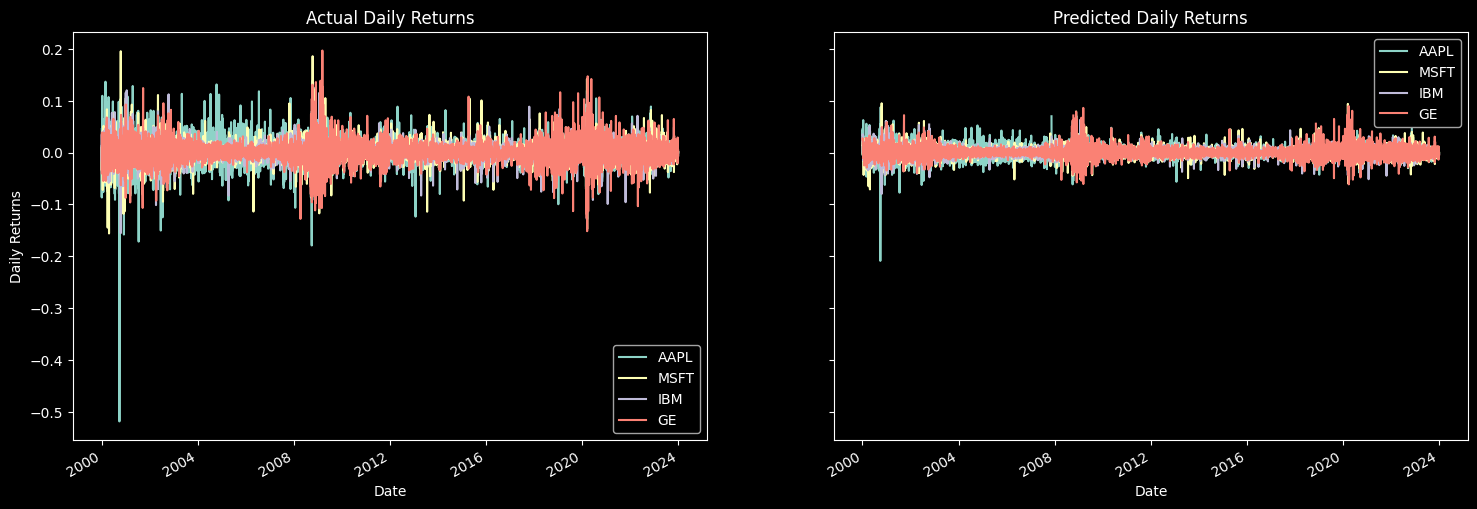

In [355]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(18,6))

data_daily_return.drop('SP500',axis=1).plot(ax=axes[0])
expected_returns.plot(ax=axes[1])
axes[0].set_title('Actual Daily Returns')
axes[1].set_title('Predicted Daily Returns')
axes[0].set_ylabel('Daily Returns')

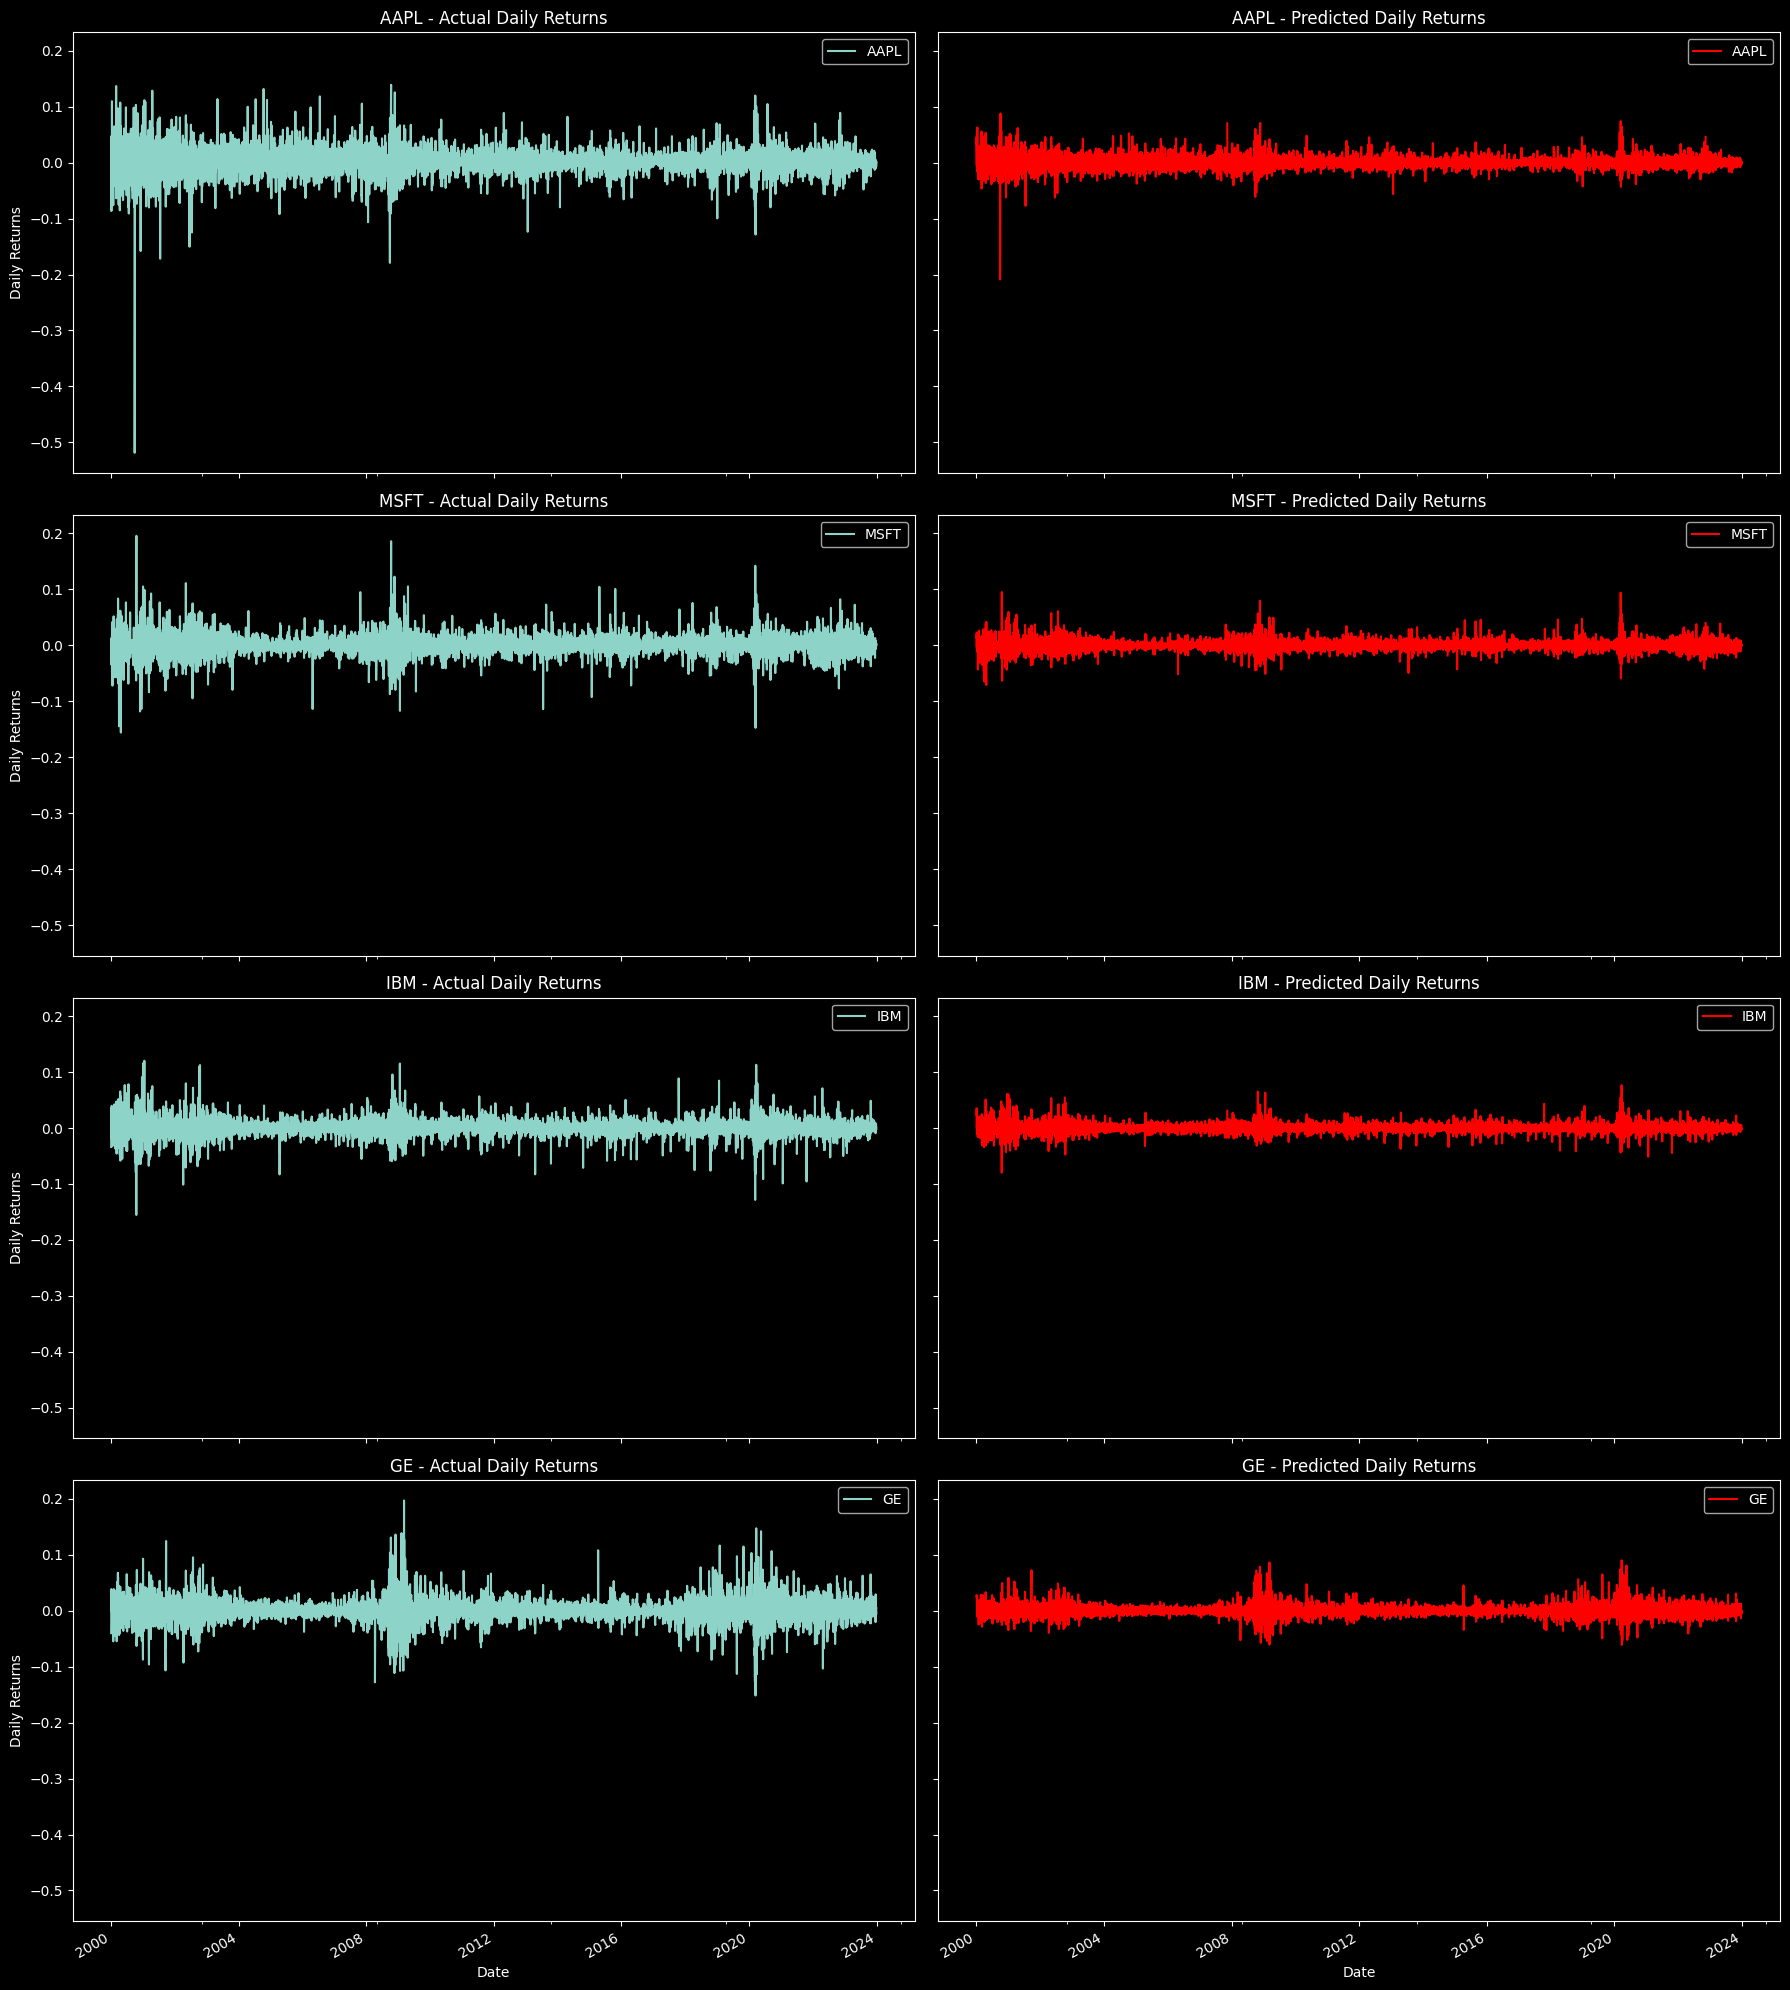

In [356]:
# List of tickers (excluding SP500)
tickers = [ticker for ticker in data_daily_return.columns if ticker != 'SP500']

# Number of tickers
num_tickers = len(tickers)

# Create subplots
fig, axes = plt.subplots(num_tickers, 2, figsize=(18, 5 * num_tickers), sharex=True, sharey=True)

# If there's only one ticker, `axes` will be a 1D array, not 2D.
if num_tickers == 1:
    axes = [axes]

# Plot each ticker
for i, ticker in enumerate(tickers):
    # Actual returns
    data_daily_return[[ticker]].plot(ax=axes[i][0], title=f'{ticker} - Actual vs Predicted', legend=True)
    axes[i][0].set_ylabel('Daily Returns')
    axes[i][0].set_title(f'{ticker} - Actual Daily Returns')

    # Predicted returns
    expected_returns[[ticker]].plot(ax=axes[i][1], color='r', legend=True)
    axes[i][1].set_title(f'{ticker} - Predicted Daily Returns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The time varying CAPM Model is decently capturing daily returns for both highs and lows. But in general, we can clearly see that it can capture a glimpse of daily returns during time crisis (2000-2008-2020).